stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Fri Jul 15 08:56:20 2022
sim end: Fri Jul 15 09:05:04 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


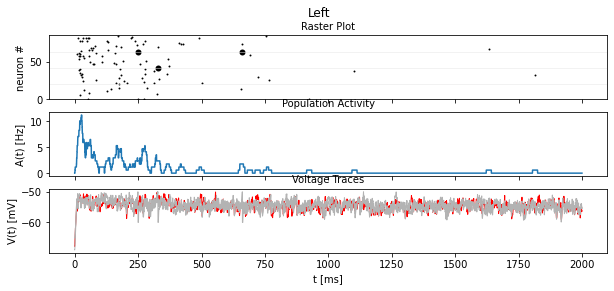

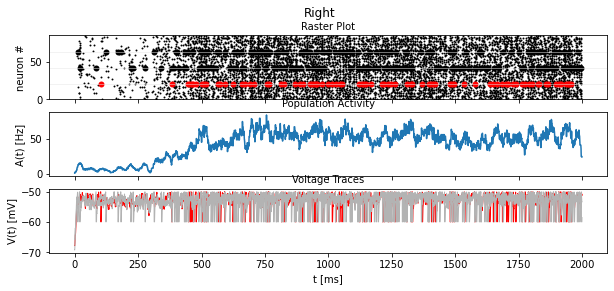

In [2]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [4]:
rmp_A = results["voltage_monitor_A"]

In [6]:
np.shape(rmp_A)

(85,)

In [ ]:
지금은 85개의 cell 이지만 population 안에 있는 모든 cell 의 average 를 구할 수도 있다.  

In [15]:
a = rmp_A[3].v/b2.mV

n_time = len(rmp_A[3].v)

In [16]:
n_time

20000

In [19]:
n_sample_cells = np.shape(rmp_A)[0]

In [20]:
n_sample_cells

85

In [22]:
rmp_mat = np.zeros([n_sample_cells, n_time])

In [25]:
rmp_mat[0,:] = rmp_A[0].v/b2.mV

In [29]:
for i in range(n_sample_cells):
    rmp_mat[i,:] = rmp_A[i].v/b2.mV
    

In [37]:
rmp_mat_ave=(rmp_mat.mean(axis=0))

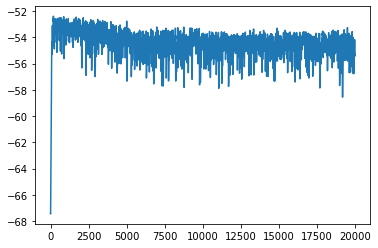

In [39]:
plt.plot(rmp_mat_ave)

In [45]:
rmp_B = results["voltage_monitor_B"]

In [46]:
rmp_mat_B = np.zeros([n_sample_cells, n_time])

In [47]:
for i in range(n_sample_cells):
    rmp_mat_B[i,:] = rmp_B[i].v/b2.mV
    

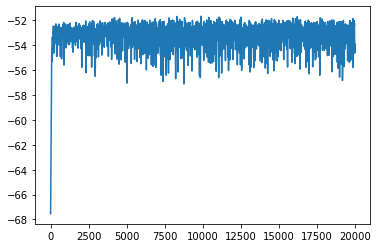

In [48]:
rmp_mat_B_ave=(rmp_mat_B.mean(axis=0))
plt.plot(rmp_mat_B_ave)

rolling the average to see the pattern better 

In [49]:
import pandas as pd

In [50]:
rmp_mat_B_ave_series = pd.Series(rmp_mat_B_ave)

In [51]:
rmp_mat_A_ave_series = pd.Series(rmp_mat_ave)

In [58]:
t_average = rmp_mat_A_ave_series.rolling(window=5000).mean()


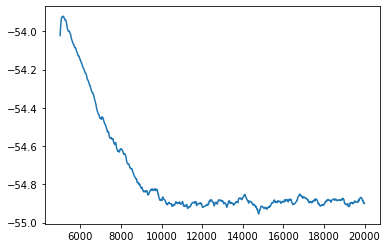

In [59]:
plt.plot(t_average)

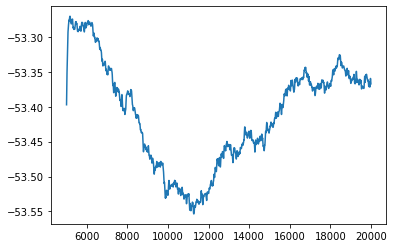

In [60]:
t_average = rmp_mat_B_ave_series.rolling(window=5000).mean()
plt.plot(t_average)